# Store comparison

In [1]:
import os
directory=os.getcwd()
print(directory)


/Users/kultiginbozdemir/Documents/GitHub/vytal/angelo


In [2]:
#import packages
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 
import datetime as dt

from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error

In [3]:
# Import customer list
u_df=pd.read_csv('./Users_sanitized.csv', sep=',', index_col='UserId')
#u_df.head()

In [4]:
%store -r co_store_delta
m_df=co_store_delta.copy()


In [5]:
m_df.head(2)

,MerchantId,Name,Longitude,Latitude,CreationDate,CategoryId,StreetAddress,City,SellsOfflineCards,geometry,check_ins,check_outs,delta,cater_in,cater_out,cater_delta,cater_out_ratio
Id,,,,,,,,,,,,,,,,,
37750976-cd54-44a5-a05a-d85d3cc9035b,2c1b374d-3d05-4b74-a260-a479c8ef9232,Krua Thai 2 - Heumarkt,6.960161,50.935471,2020-10-20 20:04:31.643369+02:00,2,Heumarkt 25,Köln,False,POINT (6.96016 50.93547),4607.0,-5932.0,-1325.0,6.0,0.0,6.0,-0.0
d4e38d94-eb54-4049-b721-4da7c79f3891,2c9fdbe4-3e32-4916-ba19-147258d0dd1d,Fenster zum Hof,6.944754,50.948689,2019-09-22 21:53:24.930669+02:00,2,Im Mediapark 5,Köln,False,POINT (6.94475 50.94869),60.0,-47.0,13.0,0.0,0.0,0.0,-0.0


In [6]:
%store -r c_co_out
%store -r c_co_in
out_df=c_co_out.copy()
in_df=c_co_in.copy()

In [7]:
def store_ops(selected_store):
    store_out=out_df[out_df['owner_store_id']==selected_store].copy()
    store_in=in_df[in_df['next_owner_store_id']==selected_store].copy()
    ops_day=store_out.groupby(store_out['OwnerSince'].dt.date).size()*(-1) # going out containers
    ops_day=pd.DataFrame(ops_day, columns=['out'])
    ops_day.index.names=['Date']
    ops_day['in']=store_in.groupby(store_in['OwnerTill'].dt.date).size()
    ops_day=ops_day.fillna(0)
    ops_day['sum']=ops_day['out']+ops_day['in']
    return ops_day
    

    

In [8]:
store_ops('ebbeabd8-0201-4af9-b9fa-a997abcb6bfb')

,out,in,sum
Date,,,
2020-06-30,-9,0.0,-9.0
2020-07-06,-1,0.0,-1.0
2020-07-07,-7,3.0,-4.0
2020-07-08,-10,0.0,-10.0
2020-07-09,-2,0.0,-2.0
...,...,...,...
2022-02-25,-14,17.0,3.0
2022-03-01,-21,14.0,-7.0
2022-03-02,-22,16.0,-6.0


In [9]:
m_df.head(2)

,MerchantId,Name,Longitude,Latitude,CreationDate,CategoryId,StreetAddress,City,SellsOfflineCards,geometry,check_ins,check_outs,delta,cater_in,cater_out,cater_delta,cater_out_ratio
Id,,,,,,,,,,,,,,,,,
37750976-cd54-44a5-a05a-d85d3cc9035b,2c1b374d-3d05-4b74-a260-a479c8ef9232,Krua Thai 2 - Heumarkt,6.960161,50.935471,2020-10-20 20:04:31.643369+02:00,2,Heumarkt 25,Köln,False,POINT (6.96016 50.93547),4607.0,-5932.0,-1325.0,6.0,0.0,6.0,-0.0
d4e38d94-eb54-4049-b721-4da7c79f3891,2c9fdbe4-3e32-4916-ba19-147258d0dd1d,Fenster zum Hof,6.944754,50.948689,2019-09-22 21:53:24.930669+02:00,2,Im Mediapark 5,Köln,False,POINT (6.94475 50.94869),60.0,-47.0,13.0,0.0,0.0,0.0,-0.0


In [10]:
inv_df=pd.DataFrame()
for i,row in m_df.iterrows():
    inv_df=pd.concat([inv_df,store_ops(i)['out'].rename(i)], axis=1)
    
#resort index according to date order
inv_df.sort_index(inplace=True)

In [11]:
begin=inv_df.index>=pd.to_datetime('01JAN21:00:00:00',format='%d%b%y:%H:%M:%S', utc=False)
end=inv_df.index<=pd.to_datetime('31AUG21:00:00:00',format='%d%b%y:%H:%M:%S', utc=False)

cor_df=inv_df[begin &end].corr()

/Users/kultiginbozdemir/opt/anaconda3/envs/vytal/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [12]:

cor_df

,37750976-cd54-44a5-a05a-d85d3cc9035b,d4e38d94-eb54-4049-b721-4da7c79f3891,74c987fb-9af6-4ea7-aaa8-413edbef6ee6,2b27f29f-d62f-4272-a4e5-b0c2605be351,ea6640b6-7407-4a04-b989-328ecc9ce341,4d864997-3feb-4e56-911d-64930693f726,5f0370ee-3052-4d2f-8a11-dfcc20bbff71,757b666d-48e5-4d9b-9b8a-d399e51c231c,dd06532d-b30d-438b-9391-cd3b4f7c89c0,e75e1bbf-d814-447a-b075-207821def6f9,...,69261163-09b2-4ff6-ab9a-8c87c7c2bee6,c186b460-80a0-4f08-99e7-ae07c850c029,1428112d-9cde-4ebf-9050-0d0c69c3909b,46ed6232-1c4a-4779-92e0-1b52a501753e,d70061f2-c50f-48cd-a849-7f569482bdc8,504504e5-41f4-411d-a2f7-8bbc59b86384,ebbeabd8-0201-4af9-b9fa-a997abcb6bfb,84bcefe2-c3f2-4214-8342-e78b83bcacdc,825df884-f2cd-4c89-bf27-b63042035435,ed06f80c-db3c-4167-9dd2-d1bd7c5da1c5
37750976-cd54-44a5-a05a-d85d3cc9035b,1.000000,NaN,-0.013498,NaN,NaN,NaN,-0.928571,0.307519,0.016595,NaN,...,NaN,0.175067,-0.054125,0.026937,0.239234,NaN,-0.130024,0.008514,-0.005430,0.064783
d4e38d94-eb54-4049-b721-4da7c79f3891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74c987fb-9af6-4ea7-aaa8-413edbef6ee6,-0.013498,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.066642,NaN,...,1.000000e+00,0.459059,-0.207973,0.100474,0.138462,NaN,0.034476,-0.035989,0.141262,0.264770
2b27f29f-d62f-4272-a4e5-b0c2605be351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ea6640b6-7407-4a04-b989-328ecc9ce341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504504e5-41f4-411d-a2f7-8bbc59b86384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,NaN,1.0,-1.000000,NaN,1.000000,1.000000
ebbeabd8-0201-4af9-b9fa-a997abcb6bfb,-0.130024,NaN,0.034476,NaN,NaN,NaN,-0.989743,0.557962,0.124874,NaN,...,3.333333e-01,0.149908,-0.100216,0.251445,-0.192545,-1.0,1.000000,0.110794,-0.099676,0.144356
84bcefe2-c3f2-4214-8342-e78b83bcacdc,0.008514,NaN,-0.035989,NaN,NaN,NaN,0.142374,0.062043,0.012603,NaN,...,-6.029468e-01,-0.093206,0.272858,0.075570,-0.126991,NaN,0.110794,1.000000,0.105499,-0.171009
825df884-f2cd-4c89-bf27-b63042035435,-0.005430,NaN,0.141262,NaN,NaN,NaN,0.104405,0.331010,0.047546,NaN,...,-9.136594e-17,-0.058163,0.098829,-0.284331,0.180253,1.0,-0.099676,0.105499,1.000000,-0.167650


In [13]:
for i, row in cor_df.head().iterrows():
    print(i,'-------')
    print(row[row<-0.8])

37750976-cd54-44a5-a05a-d85d3cc9035b -------
5f0370ee-3052-4d2f-8a11-dfcc20bbff71   -0.928571
1005515d-f1ea-4d58-a93b-3d18b3acc4c9   -1.000000
ec3d5007-fa18-4ba8-94bc-83b6b13b6105   -0.876094
Name: 37750976-cd54-44a5-a05a-d85d3cc9035b, dtype: float64
d4e38d94-eb54-4049-b721-4da7c79f3891 -------
Series([], Name: d4e38d94-eb54-4049-b721-4da7c79f3891, dtype: float64)
74c987fb-9af6-4ea7-aaa8-413edbef6ee6 -------
ddfc8021-4e04-43fb-b138-ed97c2ab2dc9   -0.995871
3a0c1ef0-a386-4f77-be21-b00c003290f2   -1.000000
aee8e260-ee53-40be-983e-129b3f7801a8   -1.000000
Name: 74c987fb-9af6-4ea7-aaa8-413edbef6ee6, dtype: float64
2b27f29f-d62f-4272-a4e5-b0c2605be351 -------
Series([], Name: 2b27f29f-d62f-4272-a4e5-b0c2605be351, dtype: float64)
ea6640b6-7407-4a04-b989-328ecc9ce341 -------
Series([], Name: ea6640b6-7407-4a04-b989-328ecc9ce341, dtype: float64)


In [14]:
inv_df.shape

(837, 377)

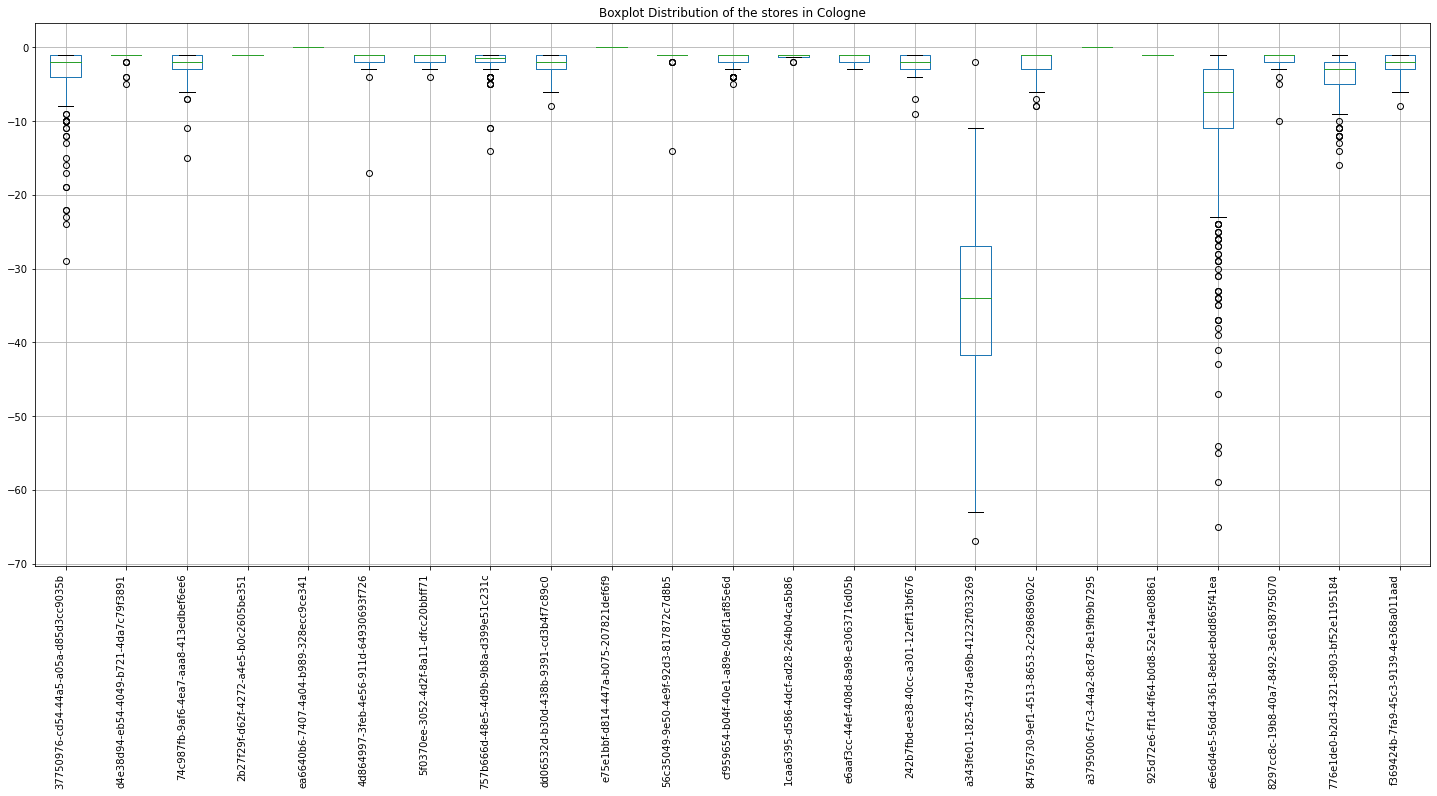

In [15]:
plt.figure(figsize=(25, 10))
plt.title('Boxplot Distribution of the stores in Cologne')
inv_df.iloc[:, :30].boxplot()
plt.xticks(rotation=90, ha='right')
plt.show()

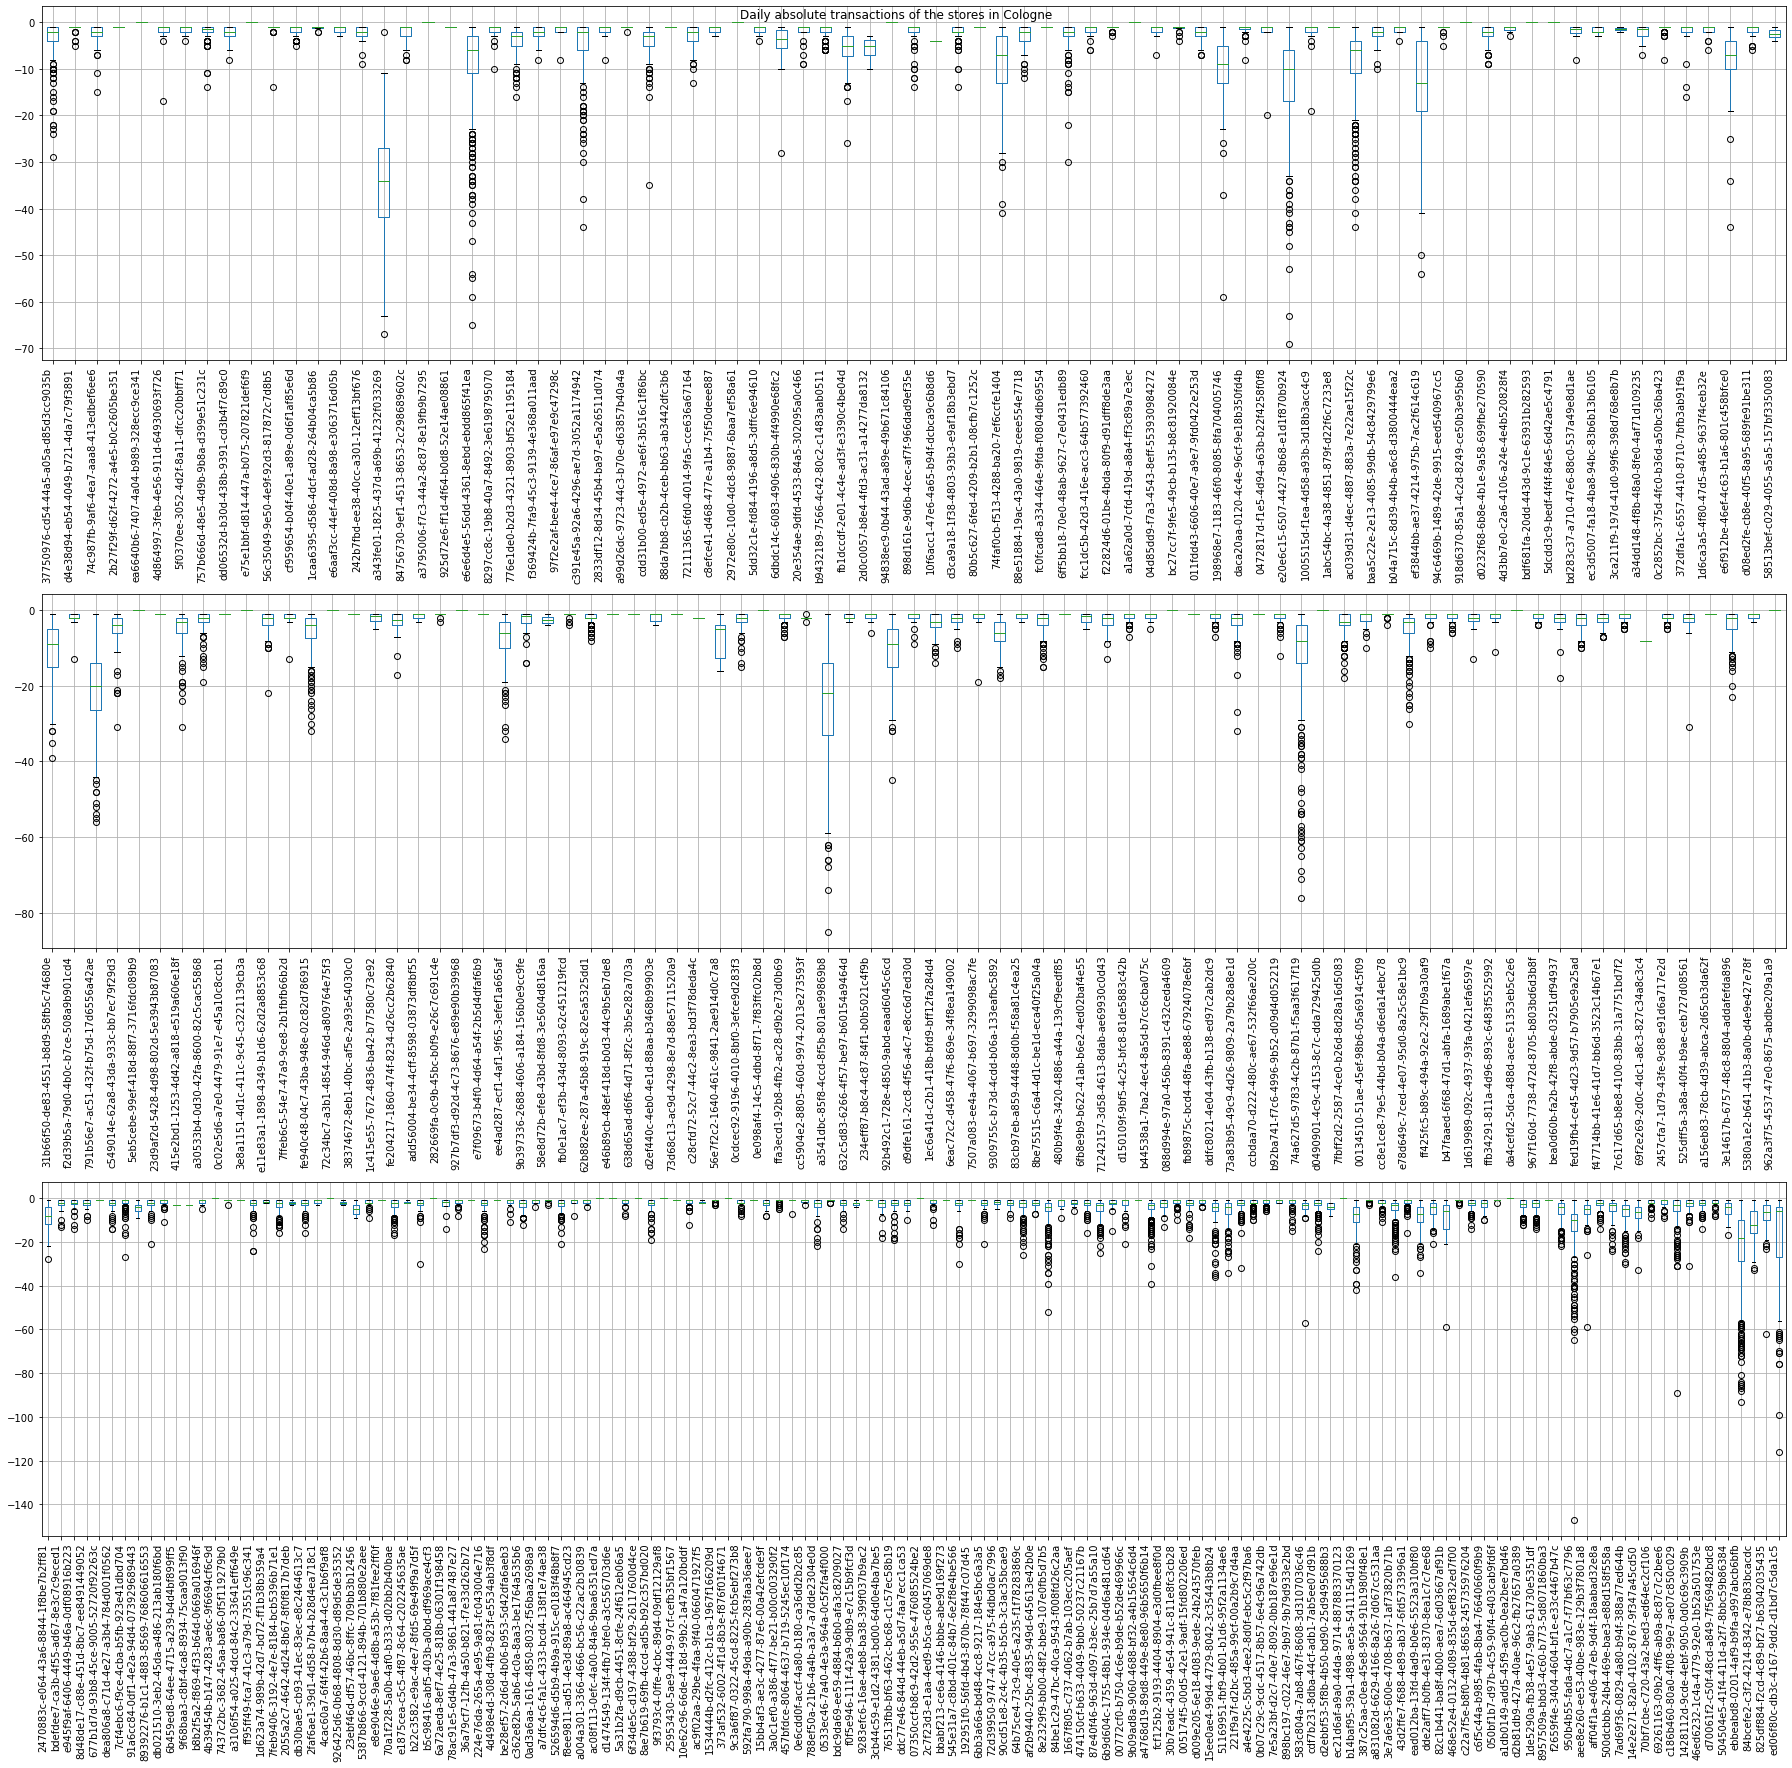

In [16]:
fig, (ax1, ax2,ax3) = plt.subplots(3,figsize=(25,25))

fig.suptitle('Daily absolute transactions of the stores in Cologne')
inv_df.iloc[:,:110].boxplot(ax=ax1)
inv_df.iloc[:,110:220].boxplot(ax=ax2)
inv_df.iloc[:,220:].boxplot(ax=ax3)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

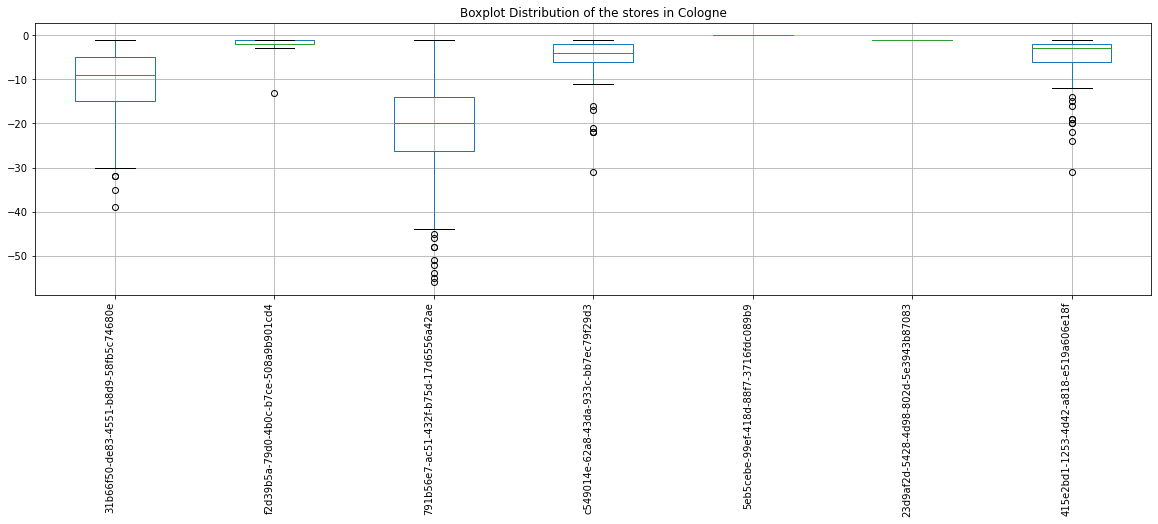

In [29]:
plt.figure(figsize=(20, 5))
plt.title('Boxplot Distribution of the stores in Cologne')
inv_df.iloc[:, 110:121].boxplot()
plt.xticks(rotation=90, ha='right')
plt.show()

In [30]:
#inv_df.iloc[:, 110:121].T

In [33]:
m_df[m_df['Name'].str.contains('Kitchenette')].index

Index(['e20e6c15-6507-4427-8b68-e1d1f870b924'], dtype='object', name='Id')

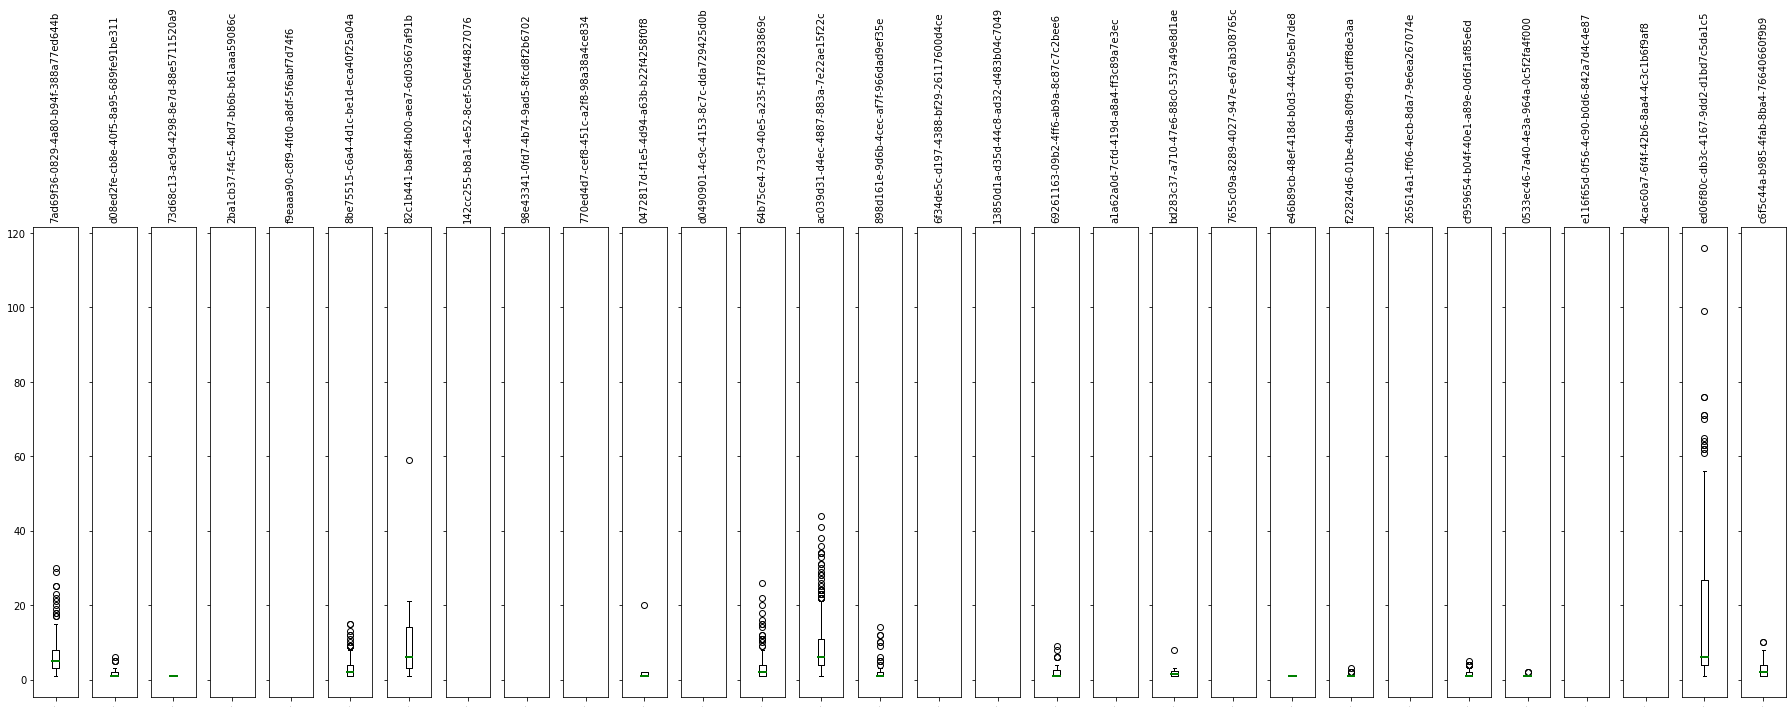

In [37]:
random30=np.random.choice(m_df.index, size=30, replace=False)

df=inv_df.T.loc[list(random30),].T
#df

df.head()

#Creating subplot of each column with its own scale
#red_circle = dict(markerfacecolor='black', marker='o', markeredgecolor='black')

fig, axs = plt.subplots(1, len(df.columns),sharey=True, figsize=(25,10))

for i, ax in enumerate(axs.flat):
    #print(ax)
    s_df=df.iloc[:,i].dropna()*(-1)
    s_df=s_df[s_df>0]
    ax.boxplot(s_df, medianprops=dict(color="Green", lw=2))
    ax.set_title(df.columns[i], fontsize=10,rotation=90)
   
    ax.tick_params(axis='x', labelsize=0, labelrotation=90)
    #ax.set_xticklabels(str(i))
   
    
    
plt.tight_layout()

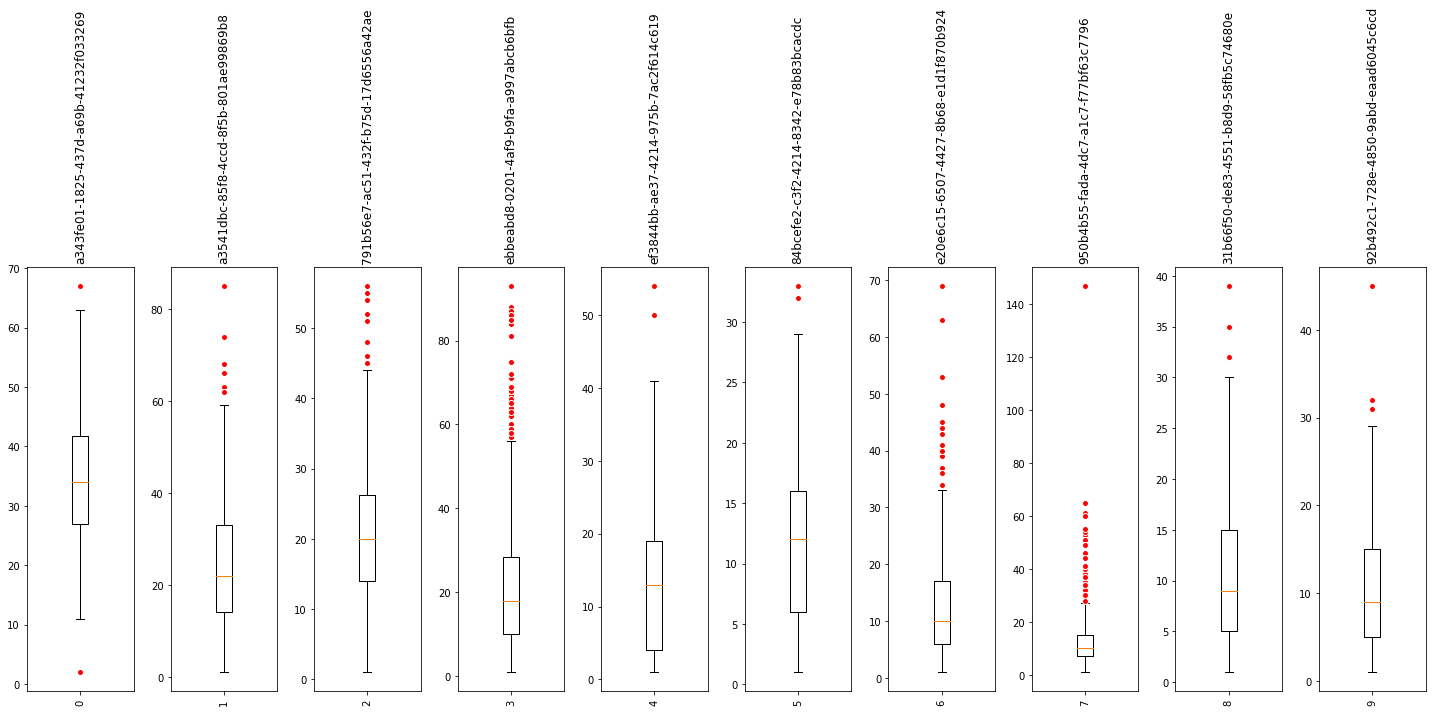

In [28]:
# Top 10 stores according to median

top10=inv_df.median().sort_values().head(10).index

list(top10)

df=inv_df.T.loc[list(top10),].T
#df

df.head()



#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns),sharey=False, figsize=(20,10))

for i, ax in enumerate(axs.flat):
    #print(ax)
    ax.boxplot(df.iloc[:,i].dropna()*(-1), flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=12,rotation=90)
    ax.tick_params(axis='x', labelsize=10, labelrotation=90)
    ax.set_xticklabels(str(i))
   
    
    
plt.tight_layout()